In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Image preprocessing

In [32]:
#dummy data
num_samples=10 #how many image samples
height,width=100,100
channels=3 #rgb

dummy_images=np.random.randint(0,256,(num_samples,height,width,channels),dtype=np.uint8)

In [30]:
target_height,target_width=80,80

### 1] Resizing image

**Purpose:** Resize input images to a specified height and width.
    
**Parameters:** height, width (target dimensions).

In [31]:
resize_layer=tf.keras.layers.Resizing(height=target_height,width=target_width)

In [33]:
resized_img=resize_layer(dummy_images)

### 2] Rescaling pixel values

**Purpose:** Normalize pixel values by scaling them to a specified range.
    
**Parameters:** scale (factor by which to scale pixel values).

In [35]:
scale = 1./255  # For rescaling

In [36]:
rescale_layer=tf.keras.layers.Rescaling(scale=scale)

In [37]:
rescaled_image=rescale_layer(dummy_images)

### 3] Center cropping

**Purpose:** Crop images from the center to a specified target size.
    
**Parameters:** height, width (target dimensions).

In [38]:
center_crop_layer=tf.keras.layers.CenterCrop(height=target_height,width=target_width)

In [39]:
croped_image=center_crop_layer(dummy_images)

In [40]:
#Ploting all the images

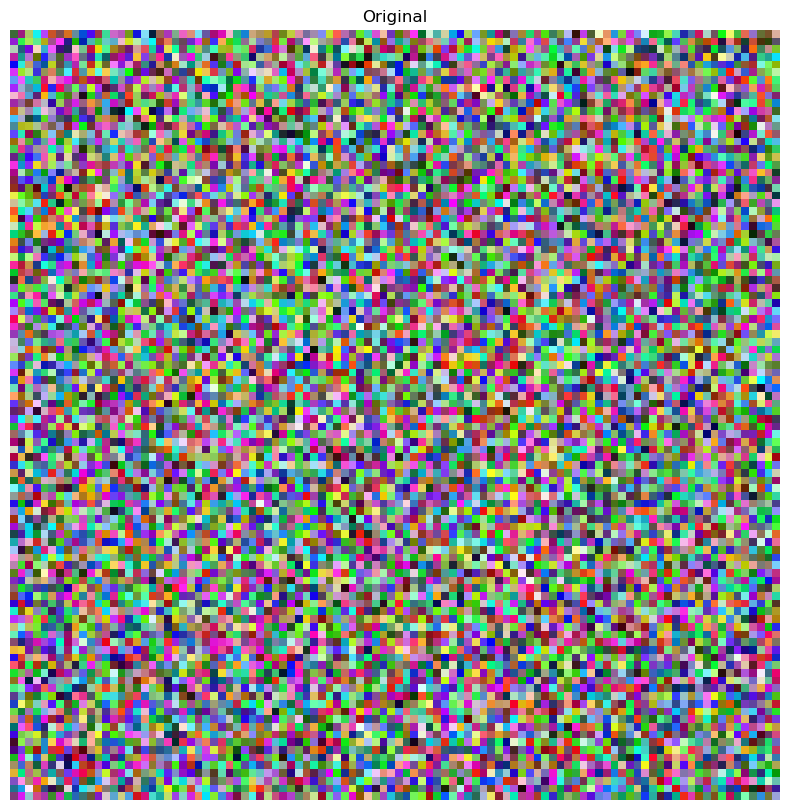

In [48]:
plt.figure(figsize=(15,10))

#original image
for i in range(num_samples):
    plt.imshow(dummy_images[i].astype(np.uint8))
    plt.title('Original')
    plt.axis('off')

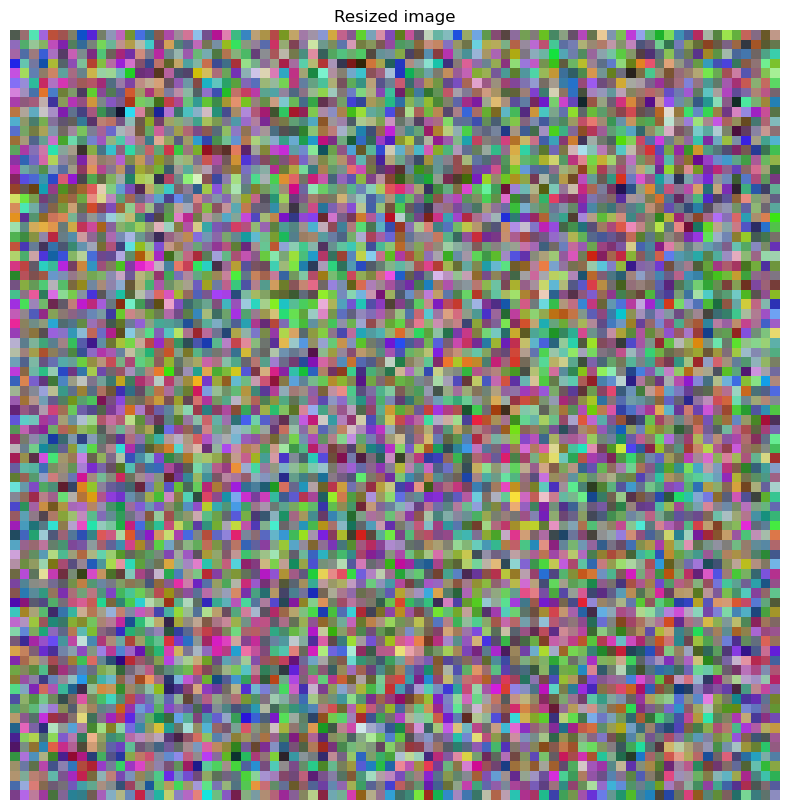

In [49]:
plt.figure(figsize=(15,10))
#resized images
for i in range(num_samples):
    plt.imshow(resized_img[i].numpy().astype(np.uint8))
    plt.title('Resized image')
    plt.axis('off')

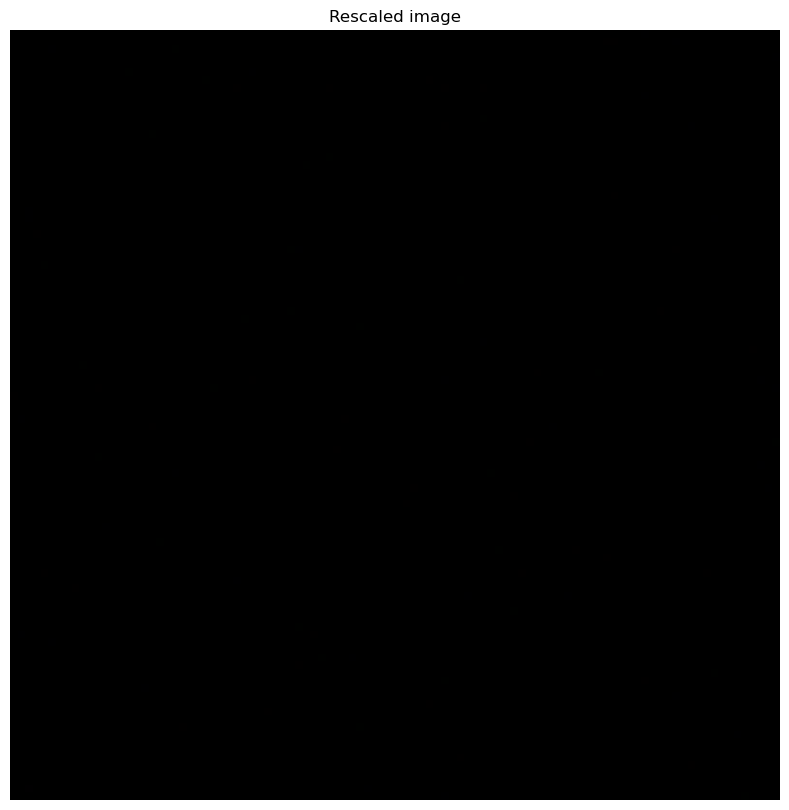

In [50]:
plt.figure(figsize=(15,10))
#rescaled images
for i in range(num_samples):
    plt.imshow(rescaled_image[i].numpy().astype(np.uint8))
    plt.title('Rescaled image')
    plt.axis('off')

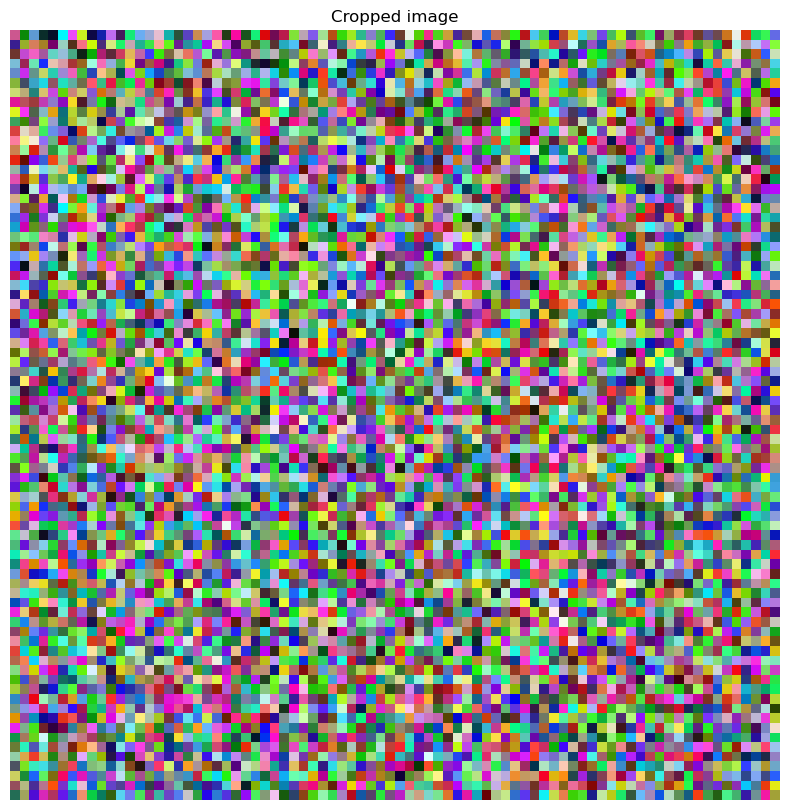

In [51]:
plt.figure(figsize=(15,10))
#cropped image
for i in range(num_samples):
    plt.imshow(croped_image[i].numpy().astype(np.uint8))
    plt.title('Cropped image')
    plt.axis('off')
    

# Image Augmentation

In [53]:
#reading an image
path='person.jpg'
image=tf.keras.preprocessing.image.load_img(path,target_size=(150,150))

(-0.5, 149.5, 149.5, -0.5)

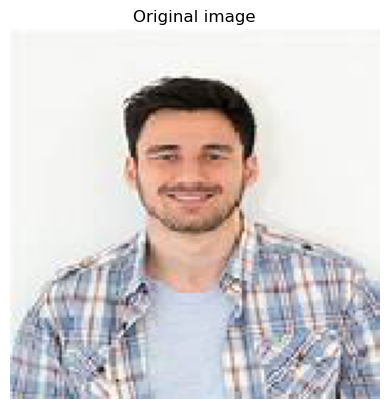

In [54]:
#plotting the original image
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

In [56]:
#image-->image_array
img_arr=tf.keras.preprocessing.image.img_to_array(image)
img_arr

array([[[252., 252., 250.],
        [250., 250., 248.],
        [249., 249., 247.],
        ...,
        [248., 248., 246.],
        [248., 248., 246.],
        [248., 248., 246.]],

       [[250., 250., 248.],
        [248., 248., 246.],
        [246., 246., 244.],
        ...,
        [246., 246., 244.],
        [246., 246., 244.],
        [246., 246., 244.]],

       [[246., 246., 244.],
        [244., 244., 242.],
        [243., 243., 241.],
        ...,
        [246., 246., 244.],
        [246., 246., 244.],
        [246., 246., 244.]],

       ...,

       [[224., 224., 255.],
        [153., 157., 182.],
        [184., 191., 197.],
        ...,
        [135., 150., 179.],
        [128., 145., 175.],
        [136., 151., 180.]],

       [[196., 194., 233.],
        [145., 145., 171.],
        [182., 187., 193.],
        ...,
        [140., 155., 184.],
        [138., 155., 185.],
        [144., 159., 188.]],

       [[214., 209., 249.],
        [169., 166., 193.],
        [199., 1

### 1] Using ImageDataGenerator

In [57]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rotation_range=30,                # Random rotation in the range [-30, 30] degrees
    width_shift_range=0.2,            # Random horizontal shift by 20% of the width
    height_shift_range=0.2,           # Random vertical shift by 20% of the height
    shear_range=0.2,                  # Shear intensity (shear angle in radians)
    zoom_range=0.2,                   # Random zoom up to 20%
    horizontal_flip=True,             # Randomly flip images horizontally
    brightness_range=[0.8, 1.2]       # Random brightness adjustment range
)

In [60]:
#for data gnerator the rank(dim) show be 4 i.e (batchsize,height,width,channels)
expanded_img=tf.expand_dims(img_arr,axis=0).numpy()

In [70]:
#datagen.flow(...) creates an iterator that can yield batches of augmented images indefinitely.
#thus we using next for looping the iterator
augmented_images=next(datagen.flow(expanded_img,batch_size=1))

In [71]:
augmented_images

array([[[[216., 216., 214.],
         [216., 216., 214.],
         [216., 216., 214.],
         ...,
         [215., 215., 213.],
         [215., 215., 213.],
         [215., 215., 213.]],

        [[216., 216., 214.],
         [216., 216., 214.],
         [216., 216., 214.],
         ...,
         [215., 215., 213.],
         [215., 215., 213.],
         [215., 215., 213.]],

        [[216., 216., 214.],
         [216., 216., 214.],
         [216., 216., 214.],
         ...,
         [215., 215., 213.],
         [215., 215., 213.],
         [215., 215., 213.]],

        ...,

        [[160., 162., 163.],
         [152., 156., 150.],
         [132., 136., 134.],
         ...,
         [179., 166., 164.],
         [169., 157., 154.],
         [160., 148., 146.]],

        [[153., 156., 153.],
         [156., 160., 154.],
         [119., 123., 124.],
         ...,
         [192., 182., 179.],
         [187., 177., 173.],
         [183., 172., 169.]],

        [[146., 150., 145.],
       

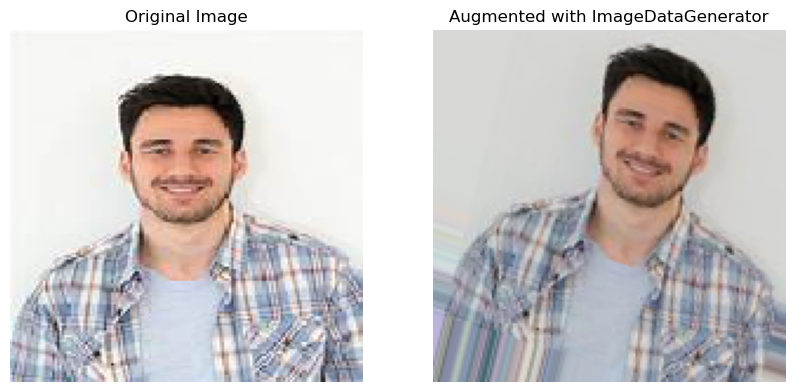

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_arr.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[0].astype(np.uint8))
plt.title('Augmented with ImageDataGenerator')
plt.axis('off')

plt.show()

### 2] Defining using model

In [76]:
augmented_model=tf.keras.Sequential([
    tf.keras.layers.RandomCrop(height=80, width=80),                   # Randomly crop images to 80x80 pixels
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),        # Randomly flip images horizontally and vertically
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),  # Randomly translate images horizontally and vertically
    tf.keras.layers.RandomRotation(factor=0.2),                        # Randomly rotate images by 20% of 360 degrees
    tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),   # Randomly zoom into images by 20% of the height and width
    tf.keras.layers.RandomContrast(factor=0.2),                        # Randomly adjust contrast by 20%
    tf.keras.layers.RandomBrightness(factor=0.2)                       # Randomly adjust brightness by 20%
])

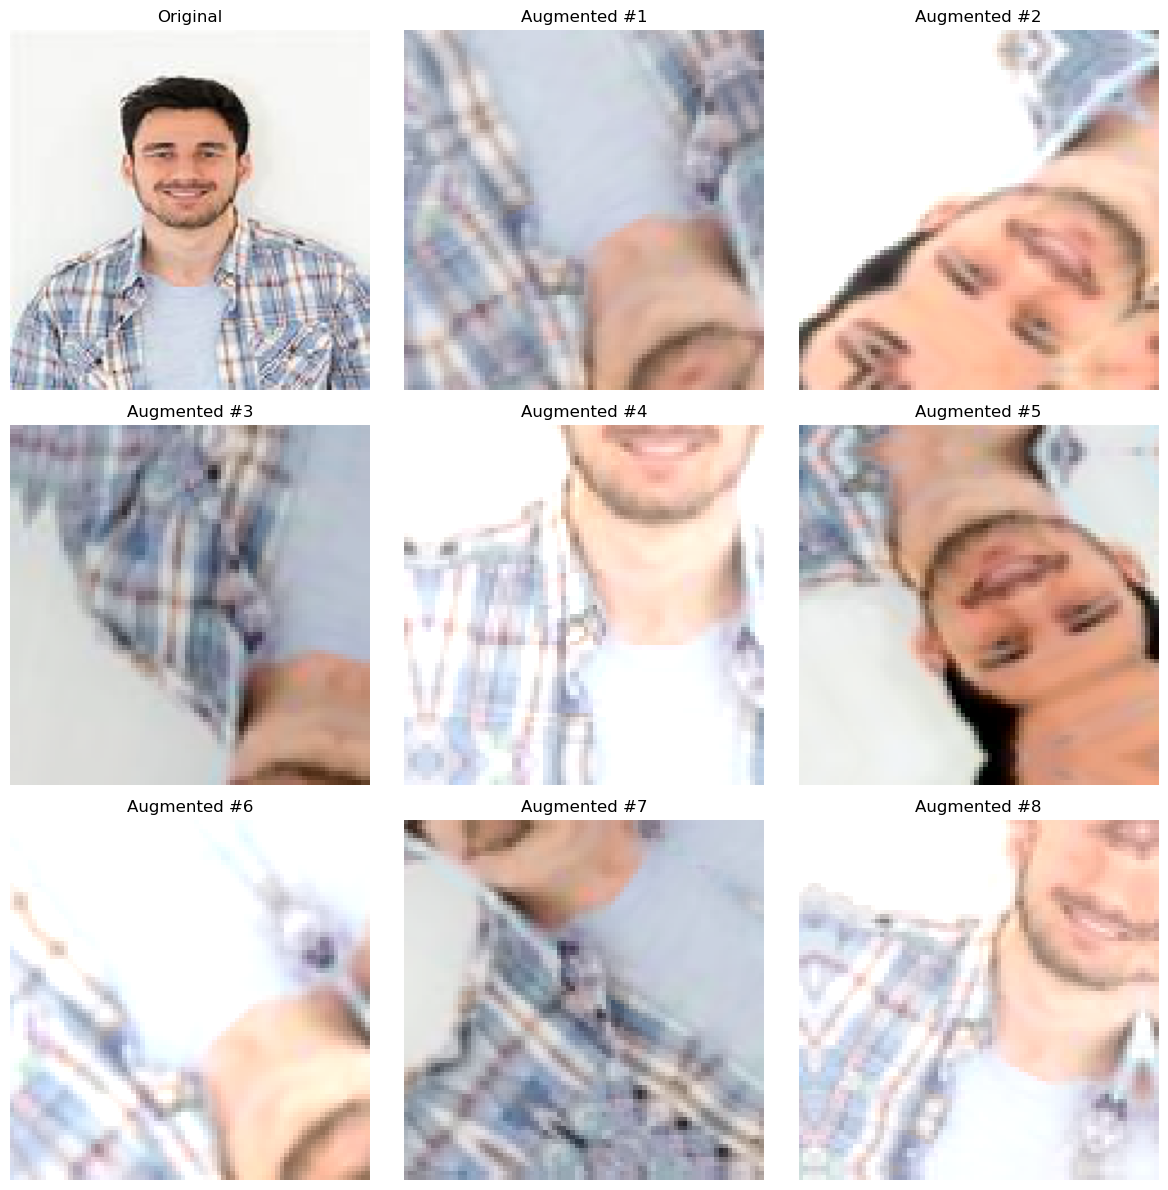

In [82]:
# Apply the augmentation layers to the image and visualize the results
plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.title('Original')
plt.imshow(img_arr.astype(np.uint8))
plt.axis('off')

# Augmented Images
for i in range(8):
    augmented_image = np.expand_dims(img_arr, axis=0)
    augmented_image = augmented_model(augmented_image, training=True)
    
    plt.subplot(3, 3, i + 2)
    plt.title(f'Augmented #{i + 1}')
    plt.imshow(np.squeeze(augmented_image.numpy().astype(np.uint8)))
    plt.axis('off')

plt.tight_layout()
plt.show()